In [1]:
import pickle
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from skimage import transform
from sklearn.metrics import accuracy_score
from keras import backend as K

plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 1.4
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 16

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Split train / validation
n = x_train.shape[0]
ind = np.random.permutation(n)
c = 0.9
n_train = int(c*n)
train_ind = ind[:n_train]
valid_ind = ind[n_train:]

x_valid = x_train[valid_ind]
y_valid = y_train[valid_ind]
x_train = x_train[train_ind]
y_train = y_train[train_ind]

In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [4]:
history = model.fit(np.expand_dims(x_train, 3), 
                    keras.utils.to_categorical(y_train), 
                    batch_size=64, epochs=10,
                    validation_data=(np.expand_dims(x_valid, 3), 
                                     keras.utils.to_categorical(y_valid)))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 151s 3ms/step - loss: 0.5937 - acc: 0.7804 - val_loss: 0.3889 - val_acc: 0.8545
Epoch 2/10
54000/54000 [==============================] - 16s 300us/step - loss: 0.4053 - acc: 0.8536 - val_loss: 0.3262 - val_acc: 0.8813
Epoch 3/10
54000/54000 [==============================] - 16s 301us/step - loss: 0.3615 - acc: 0.8668 - val_loss: 0.2992 - val_acc: 0.8898
Epoch 4/10
54000/54000 [==============================] - 16s 301us/step - loss: 0.3369 - acc: 0.8760 - val_loss: 0.2776 - val_acc: 0.8962
Epoch 5/10
54000/54000 [==============================] - 16s 301us/step - loss: 0.3220 - acc: 0.8809 - val_loss: 0.2622 - val_acc: 0.9013
Epoch 6/10
54000/54000 [==============================] - 16s 301us/step - loss: 0.3054 - acc: 0.8872 - val_loss: 0.2485 - val_acc: 0.9062
Epoch 7/10
54000/54000 [==============================] - 16s 302us/step - loss: 0.2949 - acc: 0.8919 - val_loss: 0.24

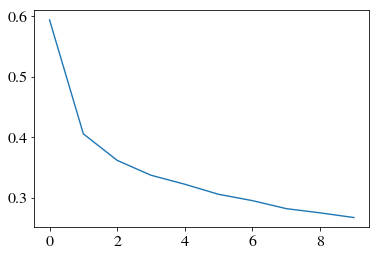

In [16]:
plt.plot(history.history['loss'])

In [17]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Split train / validation
n = x_train.shape[0]
ind = np.random.permutation(n)
c = 0.6
n_train = int(c*n)
train_ind = ind[:n_train]
valid_ind = ind[n_train:]

x_valid = x_train[valid_ind]
y_valid = y_train[valid_ind]
x_train = x_train[train_ind]
y_train = y_train[train_ind]

In [19]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
history = model.fit(np.expand_dims(x_train, 3), 
                    keras.utils.to_categorical(y_train), 
                    batch_size=64, epochs=10,
                    validation_data=(np.expand_dims(x_valid, 3), 
                                     keras.utils.to_categorical(y_valid)))

Train on 36000 samples, validate on 24000 samples
Epoch 1/10
36000/36000 [==============================] - 13s 366us/step - loss: 0.6907 - acc: 0.7431 - val_loss: 0.4338 - val_acc: 0.8423
Epoch 2/10
36000/36000 [==============================] - 13s 357us/step - loss: 0.4564 - acc: 0.8354 - val_loss: 0.3575 - val_acc: 0.8744
Epoch 3/10
36000/36000 [==============================] - 13s 355us/step - loss: 0.4053 - acc: 0.8535 - val_loss: 0.3326 - val_acc: 0.8806
Epoch 4/10
36000/36000 [==============================] - 13s 354us/step - loss: 0.3717 - acc: 0.8636 - val_loss: 0.3116 - val_acc: 0.8882
Epoch 5/10
36000/36000 [==============================] - 13s 357us/step - loss: 0.3483 - acc: 0.8728 - val_loss: 0.2959 - val_acc: 0.8918
Epoch 6/10
36000/36000 [==============================] - 13s 354us/step - loss: 0.3290 - acc: 0.8786 - val_loss: 0.2796 - val_acc: 0.8981
Epoch 7/10
36000/36000 [==============================] - 13s 356us/step - loss: 0.3146 - acc: 0.8846 - val_loss: 0.

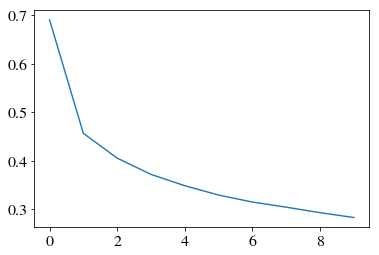

In [25]:
plt.plot(history.history['loss'])

In [26]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Split train / validation
n = x_train.shape[0]
ind = np.random.permutation(n)
c = 0.9
n_train = int(c*n)
train_ind = ind[:n_train]
valid_ind = ind[n_train:]

x_valid = x_train[valid_ind]
y_valid = y_train[valid_ind]
x_train = x_train[train_ind]
y_train = y_train[train_ind]

In [28]:
noise = np.random.normal(loc=0, scale=0.1, size=x_train.shape)
x_train += noise

In [29]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
history = model.fit(np.expand_dims(x_train, 3), 
                    keras.utils.to_categorical(y_train), 
                    batch_size=64, epochs=10,
                    validation_data=(np.expand_dims(x_valid, 3), 
                                     keras.utils.to_categorical(y_valid)))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 17s 311us/step - loss: 0.6315 - acc: 0.7661 - val_loss: 0.4191 - val_acc: 0.8543
Epoch 2/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.4489 - acc: 0.8344 - val_loss: 0.3702 - val_acc: 0.8722
Epoch 3/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.4062 - acc: 0.8528 - val_loss: 0.3358 - val_acc: 0.8765
Epoch 4/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.3798 - acc: 0.8596 - val_loss: 0.3111 - val_acc: 0.8833
Epoch 5/10
54000/54000 [==============================] - 16s 304us/step - loss: 0.3651 - acc: 0.8656 - val_loss: 0.3125 - val_acc: 0.8900
Epoch 6/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.3470 - acc: 0.8701 - val_loss: 0.3030 - val_acc: 0.8928
Epoch 7/10
54000/54000 [==============================] - 16s 304us/step - loss: 0.3376 - acc: 0.8735 - val_loss: 0.2

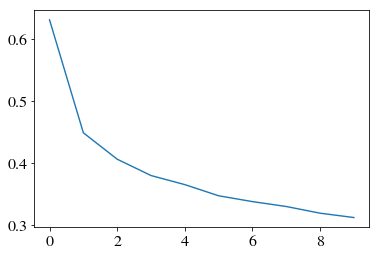

In [31]:
plt.plot(history.history['loss'])

In [32]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Split train / validation
n = x_train.shape[0]
ind = np.random.permutation(n)
c = 0.9
n_train = int(c*n)
train_ind = ind[:n_train]
valid_ind = ind[n_train:]

x_valid = x_train[valid_ind]
y_valid = y_train[valid_ind]
x_train = x_train[train_ind]
y_train = y_train[train_ind]

In [33]:
noise = np.random.normal(loc=0, scale=0.5, size=x_train.shape)
x_train += noise

In [34]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [35]:
history = model.fit(np.expand_dims(x_train, 3), 
                    keras.utils.to_categorical(y_train), 
                    batch_size=64, epochs=10,
                    validation_data=(np.expand_dims(x_valid, 3), 
                                     keras.utils.to_categorical(y_valid)))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 17s 313us/step - loss: 0.8410 - acc: 0.6830 - val_loss: 0.6860 - val_acc: 0.7767
Epoch 2/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.6644 - acc: 0.7473 - val_loss: 0.5990 - val_acc: 0.7898
Epoch 3/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.6225 - acc: 0.7625 - val_loss: 0.6052 - val_acc: 0.8115
Epoch 4/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.6005 - acc: 0.7724 - val_loss: 0.5853 - val_acc: 0.8150
Epoch 5/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.5839 - acc: 0.7762 - val_loss: 0.5750 - val_acc: 0.8257
Epoch 6/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.5689 - acc: 0.7842 - val_loss: 0.5486 - val_acc: 0.8242
Epoch 7/10
54000/54000 [==============================] - 16s 303us/step - loss: 0.5595 - acc: 0.7867 - val_loss: 0.5

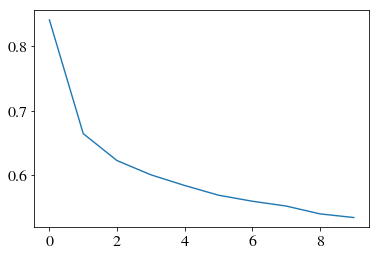

In [36]:
plt.plot(history.history['loss'])